### Подключение библиотек


In [541]:
import yfinance as yf 
from datetime import datetime 
import pandas as pd 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader as pdr 
import statistics
from fractions import Fraction as F
from decimal import Decimal as D
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
from networkx.algorithms import community
import itertools
from operator import itemgetter
import statistics
from func_timeout import func_timeout, FunctionTimedOut
import copy

### Добавление тикеров для заданных рынков:
- S&P
- Germany
- NYSE
- MOEX  (Russia)
- NIKKEI  (Jpan)

In [542]:
SP_stocks = ['AMD', 'NVDA', 'IPGP', 'WDC', 'MU', 'URI', 'WYNN', 'DXC', 'MYL', 'FCX', 'MCHP', 'SWK', 'SIVB', 'CPRI', 'DVN', 'LNC', 'XEC', 'FLS', 'XLNX', 'APA', 'NTAP', 'TPR', 'SWKS', 'ALGN', 'AMAT', 'PVH', 'APTV', 'ALXN', 'KLAC', 'CDNS', 'ADI', 'EMN', 'GE', 'PH', 'MXIM', 'ALB', 'AMP', 'BWA', 'CXO', 'TXT', 'AMG', 'C', 'TWTR', 'MRO', 'AAL', 'ADSK', 'ETFC', 'HAL', 'LB', 'FDX', 'LVS', 'GPS', 'STX', 'PXD', 'AAPL', 'TRIP', 'SLB', 'UNM', 'IVZ', 'HOG', 'FTI', 'SNPS', 'MSCI', 'MOS', 'AVGO', 'NBL', 'VLO', 'FAST', 'NOV', 'FANG', 'PFG', 'PRU', 'TIF', 'CAT', 'ROK', 'ANSS', 'TROW', 'NFLX', 'HES', 'EMR', 'TXN', 'MS', 'UAA', 'PNR', 'ETN', 'ITW', 'ATVI', 'CMI', 'HFC', 'ISRG', 'MGM', 'XRX']
Germany_stocks = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE', 'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'AIR.DE', 'ARL.DE', 'BOSS.DE', 'DEQ.DE', 'DUE.DE', 'EVD.DE', 'FIE.DE', 'FRA.DE', 'G1A.DE', 'GBF.DE', 'GIL.DE', 'HNR1.DE', 'JUN3.DE', 'KRN.DE', 'KU2.DE', 'LEO.DE', 'LXS.DE', 'MAN.DE', 'NDA.DE', 'RHK.DE', 'SPR.DE', 'SZG.DE', 'SZU.DE', 'TEG.DE', 'ADV.DE', 'AFX.DE', 'BC8.DE', 'COK.DE', 'DLG.DE', 'DRI.DE', 'EVT.DE', 'FNTN.DE', 'JEN.DE', 'LPK.DE', 'MOR.DE', 'NEM.DE', 'PFV.DE', 'QIA.DE', 'QSC.DE', 'SBS.DE', 'UTDI.DE', 'AAD.DE', 'BDT.DE', 'BVB.DE', 'BYW6.DE', 'COM.DE', 'DEZ.DE', 'GLJ.DE', 'GMM.DE', 'GSC1.DE', 'INH.DE', 'MLP.DE', 'PUM.DE', 'RAA.DE', 'SGL.DE', 'SIX2.DE', 'SKB.DE', 'TTK.DE']
NYSE_stocks = ['MFA','F','GE','BAC','CHK','CCL','XOM','BA','T','MRO','WFC','FCX','MGM','PFE','DAL','OXY','MS','HAL','NLY','RCL','DIS','JPM','CPE','M','C','VZ','AUY','KO','RIG','KGC','SLB','S','KEY','SWN','CVX','X','SU','CTL','APA','GM','WMB','RRC','DNR','PG','CVS','KR','V','MO','NKE','DVN','HBI','TJX','HST','RF','IBN','LYV','WMT','JNJ','TSM','MRK','LVS','USB','HPQ','CCJ','BSX','COP','GGB','MDT','CLF']
Russia_stocks=['ROSN.ME','SBERP.ME','SBER.ME','LKOH.ME','GAZP.ME','NVTK.ME','GMKN.ME','TATN.ME','TATNP.ME','SNGS.ME','SNGSP.ME','NLMK.ME','CHMF.ME','ALRS.ME','MAGN.ME','PLZL.ME','MTSS.ME','VTBR.ME','MGNT.ME','IRAO.ME','PHOR.ME','HYDR.ME','TRNFP.ME','POLY.ME','PIKK.ME','MOEX.ME','FEES.ME','RTKM.ME','RSTI.ME','NMTP.ME','AFLT.ME','AFKS.ME','MVID.ME','TRMK.ME','MTLRP.ME','MTLR.ME']
Japan_stocks = ['7203.T','9984.T','9437.T','9432.T','8306.T','9433.T','6758.T','8316.T','7267.T','9983.T','2914.T','8058.T','8411.T','9022.T','7751.T','6902.T','6954.T','3382.T','6367.T','7201.T','4452.T','4063.T','8766.T','9020.T','4519.T','4503.T','4502.T','6501.T','8001.T','8031.T','4911.T','4548.T','6301.T','6752.T']

# 1. Сбор данных с помощью yfinance

In [543]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_SP = yf.download(SP_stocks, start=start, end=end) 
data_in_SP.to_csv('data_in.csv')
print(type(data_in_SP))

[*********************100%***********************]  92 of 92 completed
<class 'pandas.core.frame.DataFrame'>


In [544]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_NYSE = yf.download(NYSE_stocks, start=start, end=end) 
data_in_NYSE.to_csv('data_in_NYSE.csv')


[*********************100%***********************]  69 of 69 completed


In [545]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_G = yf.download(Germany_stocks, start=start, end=end) 
data_in_G.to_csv('data_in_G.csv')



[*********************100%***********************]  85 of 85 completed


In [546]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_R = yf.download(Russia_stocks, start=start, end=end) 
data_in_R.to_csv('data_in_R.csv')





[*********************100%***********************]  36 of 36 completed


In [547]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_J = yf.download(Japan_stocks, start=start, end=end) 
data_in_J.to_csv('data_in_J.csv')

[*********************100%***********************]  34 of 34 completed


### Пример данных NYSE

In [548]:
data_in_NYSE

Adj Close                                                     \
                  APA       AUY          BA        BAC    BSX          C   
Date                                                                       
2013-12-31  74.715439  7.972332  115.759911  14.121276  12.02  47.411667   
2014-01-02  74.315514  8.305285  115.912590  14.601966  11.91  47.557236   
2014-01-03  74.367668  8.185055  116.718285  14.883119  11.93  48.585350   
2014-01-06  75.037117  8.249794  117.388313  15.109859  12.33  48.958389   
2014-01-07  76.419418  8.351529  119.169350  14.964743  12.44  49.295036   
...               ...       ...         ...        ...    ...        ...   
2015-01-26  56.913662  3.965858  116.361824  14.479661  14.96  44.517887   
2015-01-27  57.019592  4.078898  114.981819  14.278681  14.74  43.989750   
2015-01-28  53.956299  3.890495  121.196159  13.885857  14.59  42.897068   
2015-01-29  54.053413  3.796295  128.260986  14.095973  14.85  43.370655   
2015-01-30  55.236347  3.871655  126.169312  13.840180  14.81  42.760452   

                                                          ...   Volume  \
                  CCJ        CCL          CHK        CLF  ...      TJX   
Date                                                      ...            
2013-12-31  17.956812  33.189735  5006.799316  23.546803  ...  3256200   
2014-01-02  17.576405  32.892292  4910.869141  23.205416  ...  4197000   
2014-01-03  17.386202  32.925331  4873.973633  22.504671  ...  3302600   
2014-01-06  17.178709  32.413074  4833.387695  22.145313  ...  6277000   
2014-01-07  17.403496  32.627895  4853.680176  21.965641  ...  6293800   
...               ...        ...          ...        ...  ...      ...   
2015-01-26  12.595204  39.623585  4004.258301   6.836830  ...  5423200   
2015-01-27  12.886680  39.081257  4026.128662   6.439120  ...  5990600   
2015-01-28  12.453884  38.267776  3803.448730   6.268672  ...  6187400   
2015-01-29  12.286065  38.030510  3819.354492   5.785738  ...  5677200   
2015-01-30  12.383223  37.250916  3813.389893   6.079286  ...  6132400   

                                                                        \
                 TSM       USB         V        VZ       WFC       WMB   
Date                                                                     
2013-12-31   7647200   4335400   6448400   7557100  13243500   6645100   
2014-01-02   6029100   7045800  10654000   9270200  17333100   6257600   
2014-01-03  11362700   4455000   7809600  12022200  14693800   4621500   
2014-01-06  10370200   8096000   8577600  16054800  18438900   6996100   
2014-01-07  13083100  11027800   8178000  17594600  16897000   8347700   
...              ...       ...       ...       ...       ...       ...   
2015-01-26  14091400   4607600   8552400  15064400  13429400   7027200   
2015-01-27  14735300   5395500  11027600  17008900  14351600   7887000   
2015-01-28  16762900   7580400  11430800  19575800  18775100   9390100   
2015-01-29  19411300   6882900  15668400  19161600  16700000   9570500   
2015-01-30  17590300  10416500  22151600  22768000  21754800  15053500   

                                          
                 WMT         X       XOM  
Date                                      
2013-12-31   3859100   4658600   8509600  
2014-01-02   6878000  11902400  11028100  
2014-01-03   4957400   5317100   9295600  
2014-01-06   7280200   5616000  11848500  
2014-01-07   5012300   4729100  11187000  
...              ...       ...       ...  
2015-01-26   4666700  12984000  10672500  
2015-01-27   6020500  15481700  12301500  
2015-01-28   5936800  34683400  17829700  
2015-01-29   6522800  21801100  22683000  
2015-01-30  10280200  15564200  22679900  

[273 rows x 414 columns]

# 2. Вычисление логарифмических доходностей 

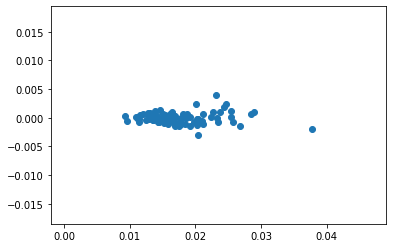

In [549]:
logR_in_SP=np.log(data_in_SP["Close"]/data_in_SP["Close"].shift(1))
logR_in_SP = logR_in_SP.drop(datetime.strptime('2013-12-31', '%Y-%m-%d'))

logR_in_G = np.log(data_in_G["Close"]/data_in_G["Close"].shift(1))
logR_in_G = logR_in_G.drop(datetime.strptime('2014-01-02', '%Y-%m-%d'))

logR_in_NYSE = np.log(data_in_NYSE["Close"]/data_in_NYSE["Close"].shift(1))
logR_in_NYSE = logR_in_NYSE.drop(datetime.strptime('2013-12-31', '%Y-%m-%d'))

logR_in_R = np.log(data_in_R["Close"]/data_in_R["Close"].shift(1))
logR_in_R = logR_in_R.drop(datetime.strptime('2014-01-06', '%Y-%m-%d'))

logR_in_J = np.log(data_in_J["Close"]/data_in_J["Close"].shift(1))
logR_in_J = logR_in_J.drop(datetime.strptime('2014-01-06', '%Y-%m-%d'))

E = logR_in_SP.mean(axis=0)
stDev = logR_in_SP.std(axis=0)
plt.scatter(stDev,E)

# 3. Вспомогательные функции

### Проверка на отсутствие данных

In [550]:
def empty_check(stocks,E):
    import math
    listOfNoData=[]
    for i in range(len(E)):
        if math.isnan(E[i]):
            listOfNoData.append(i)
        
    print("list of empty data",listOfNoData)
    for i in listOfNoData:
        print(stocks[i])
   #if listOfNoData:
       # return(stocks[listOfNoData])
   #else: 
       # return([])

### Создание графа: функция, которая по входным логарифмическим доходностям строит корреляционную матрицу и возвращает граф, построенный на этих значениях

In [718]:
def create_graph(log,stocks,T):
    dataset = []
    names = []
    e=[]
    Graph = nx.Graph()
    for i in range(0,len(stocks)):
        e.append(statistics.mean(log[stocks[i]]))
   # print(e)
    corr=np.corrcoef(log.values.T)
 #   print("real corr",corr)
    for i in range(0,len(stocks)):
        names.append((i))
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            if i!=j:
                if corr[i][j] > 0:
                    Graph.add_edge(i, j, weight=corr[i][j])
                else:
                    Graph.add_edge(i, j, weight= -corr[i][j])
    #print(len(Graph.nodes))            
    return  (Graph)

In [553]:
try:
        un1,un2, resI,wI =  func_timeout(50,separate_graph_by_spectral,args=(graph,1,1,[],[]))
                
except FunctionTimedOut:
    print("timeout")

            

### Функция, помогающая обработать результаты nx.fiedler_vector. Создает два списка вершин, исходя из результатов и возвращает 2 подграфа, состоящих из вершин списков

In [554]:
def parse_data_from_spectral(graph,res):
    list1,list2 = [], []
    for i in range(len(res)):
        if res[i]<0:
            list1.append(list(graph.nodes)[i])
        else:
            list2.append(list(graph.nodes)[i])
    #print("lists in parse",list1,list2)
    return(graph.subgraph(list1),graph.subgraph(list2))

### Фунция реализация спектрального метода. Использует рекурсивный подход. На вход подается число кластеров и если вершин в обеих половинах достаточно, то мы половину делений делаем в первом подграфе и другую половину во втором. Достаточное количество вершин для дальнейшего деления - 6



In [603]:

def separate_graph_by_spectral(graph,k,w, res_Spectral, weight_scheme_spectral):
    if k>0:
        graph1, graph2 = parse_data_from_spectral(graph, nx.fiedler_vector(graph,weight='weight'))
        if len(list(graph1.nodes))>len(list(graph2.nodes)):
            cur = graph1
            graph1 = graph2
            graph2 = cur
        k = k-1
        w = w/2
        if k>0:
            if len(list(graph1.nodes)) < 8:
                res_Spectral.append(list(graph1.node))
                weight_scheme_spectral.append(w)
                b1, b2,unknow1, unknow2 = separate_graph_by_spectral(graph2,k,w, res_Spectral, weight_scheme_spectral)
                
                return(graph1, graph2, res_Spectral, weight_scheme_spectral)   
            else:
                a1, a2,unknow1, unknow2 = separate_graph_by_spectral(graph1,math.ceil(k/2),w, res_Spectral, weight_scheme_spectral)
        else:
            weight_scheme_spectral.append(w)
            res_Spectral.append(list(graph1.node))
        if k>1:
            b1, b2,unknow1, unknow2 = separate_graph_by_spectral(graph2,k - math.ceil(k/2),w, res_Spectral, weight_scheme_spectral)
        else:
            weight_scheme_spectral.append(w)
            res_Spectral.append(list(graph2.node))
        return(graph1, graph2,res_Spectral, weight_scheme_spectral)            

### Фунция, помогающая обработать результат Stoer-Wagner. Исходя из результатов- 2 списков вершин , возвращает 2 подграфа

In [556]:
def parse_data_from_mincut(graph,res):
    list1 = res[0]
    list2 = res[1]
    return(graph.subgraph(list1),graph.subgraph(list2))

### Реализация алгоритма Стоера-Вагнера

In [557]:
def separate_by_Stoer_Wagner(graph,k,w,res_StW ,weight_scheme_StW):
   
    if k>0:
        a = list(graph.nodes)[0]
        b = list(graph.nodes)[len(list(graph.nodes))-1]
        cut_val, part = nx.stoer_wagner(graph, weight='weight')
       # print(cut_val,part)
        graph1, graph2 = parse_data_from_mincut(graph, part)
        if len(list(graph1.nodes))>len(list(graph2.nodes)):
            cur = graph1
            graph1 = graph2
            graph2 = cur
        k = k-1
        w = w/2
        if k>0:
            if len(list(graph1.nodes)) < 3:
                res_StW.append(list(graph1.node))
                weight_scheme_StW.append(w)
                b1, b2, unknow1, unknow2 = separate_by_Stoer_Wagner(graph2,k,w,res_StW ,weight_scheme_StW)
                
                return(graph1, graph2, res_StW, weight_scheme_StW)   
            else:
                a1, a2,unknow1, unknow2 = separate_by_Stoer_Wagner(graph1,math.ceil(k/2),w,res_StW ,weight_scheme_StW)
        else:
            weight_scheme_StW.append(w)
            res_StW.append(list(graph1.node))
        if k>1:
            b1, b2,unknow1, unknow2 = separate_by_Stoer_Wagner(graph2,k - math.ceil(k/2),w,res_StW ,weight_scheme_StW)
        else:
            weight_scheme_StW.append(w)
            res_StW.append(list(graph2.node))
            
            
        return(graph1, graph2, res_StW, weight_scheme_StW)     
    

### Реализация алгоритма Жирвана-Ньюмена

In [558]:
def heaviest(G):
    u, v, w = min(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [559]:
def separate_by_Girvan_Newman(graph,k):


    com = community.girvan_newman(graph, most_valuable_edge=heaviest)
    limited = itertools.takewhile(lambda c: len(c) <= k, com)
    dic = {}
    for communities in limited:
        #each separation
        old_key = -1
        for c in communities:
            
            #if (dic.get(str(c))) == None:
            if (tuple(c) in dic) == False:
                for i in dic.keys():
                    
                    if tuple(c)[0] in i:
                        old_v = dic.get(i)
                        old_key = i
                        
                if old_key != -1:
                    other = {tuple(c): old_v/2 }
                    dic.update(other)
                else: 
                    other = {tuple(c): 0.5 }
                    dic.update(other)
        if old_key != -1:
            dic.pop(old_key)
            
        res = (communities)
    weight=[]
    total = []
    for i in res:
        weight.append(dic.get(tuple(i)))
        total.append(list(i)) 
    return(total,weight)


### EW  порфель считается, как добавление всех компаний с равным весом. 

### MV  порфель считается, как портфель с минимальным риском


In [693]:
def create_portfolio_EW(logR,stocks):
   
    weight = 1/(len(stocks))
    cur_log_r = 0
    nstock= []
    for i in range(0,len(stocks)):
        cur_log_r += weight * logR[stocks[i]]
        nstock.append(i)

    #return (cur_log_r,[weight]*len(stocks))
    return (nstock,[weight]*len(stocks))

def create_portfolio_MV(stocks,logR,n):
    #testLogR = logR[stocks]
    V = np.cov(logR.values.T)
    w=0
   # if np.linalg.det(V) == 0:
        #return ("error","error")
    vec1 = [1]*len(stocks)
    vec1=np.array(vec1)
    vec1T = vec1.T
    vec1T=np.array(vec1T)
    V_inv = np.linalg.inv(V)
   # for i in range(len(V_inv)):
       # for j in range(len(V_inv)):
           # if V_inv[i][j]<0:
                #V_inv[i][j] = -V_inv[i][j]
            
    #print(V_inv)
    w = np.dot(V_inv,vec1)/np.dot(np.dot(vec1T,V_inv),vec1)
    res = logR[stocks[0]]*w[0]
    nstock= []
    for i in range(0,len(stocks)):
        #res += logR[stocks[i]]*w[i]
        nstock.append(i)
    #print(w)
    #print(sum(w))
    return (nstock,w)
    

### Подсчет весов для схемы 1: подграфы имеют половины веса исходного графа считаются во время работы алгаритма кластеризации
### Схема 2: каждый итоговый кластер имеет одинаковый вес считается тут


In [561]:
def scheme_2(res):
    scheme = [] 
    for i in range(len(res)):
        scheme.append(1/len(res))
        
    return scheme

### Создание данных для "истинного" портфеля . Для нормального распределения

In [719]:
def create_data_normal(logR_in,stocks,T):
    E=[]
    for i in (stocks):
        E.append(statistics.mean(logR_in[i]))
    cov=np.cov(logR_in.values.T)
  #  print(len(cov))
    dataset = []
    names = []
    Graph = nx.Graph()
    dataset = np.random.multivariate_normal(E,cov,T)
    dataset=pd.DataFrame(dataset)
    for i in range(0,len(stocks)):
        names.append((i))
    mer=np.corrcoef(dataset.values.T)
    #print(mer)
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            if mer[i][j] > 0:
                Graph.add_edge(i, j, weight=mer[i][j])
            else:
                Graph.add_edge(i, j, weight= -mer[i][j])
  #  print("var corr",mer)
    #print(len(Graph.nodes))            
    return (Graph,dataset,names)

In [695]:
create_data_normal(logR_in_G,Germany_stocks,500)

(<networkx.classes.graph.Graph at 0x1486bb710>,
            0         1         2         3         4         5         6   \
 0   -0.008131  0.014350 -0.007872  0.025104 -0.014975 -0.003695 -0.021057   
 1   -0.019588 -0.004746  0.009070  0.000438 -0.010362  0.014155  0.013444   
 2   -0.018611 -0.032562 -0.008102  0.004099 -0.003486 -0.007454 -0.026363   
 3    0.006668 -0.007534  0.006623  0.029108 -0.011909  0.006408  0.004926   
 4   -0.002330  0.038124 -0.017697  0.011219 -0.007543  0.019602 -0.000789   
 ..        ...       ...       ...       ...       ...       ...       ...   
 495 -0.026760 -0.008160 -0.018196  0.019272 -0.012149  0.008334 -0.006474   
 496 -0.013040 -0.015795 -0.016251 -0.001106 -0.005840 -0.009890  0.013869   
 497 -0.027856 -0.006398 -0.005875  0.021264  0.009663 -0.008219  0.003768   
 498  0.020851  0.009539  0.008109  0.039504  0.002959  0.005053  0.000183   
 499  0.012809  0.011554  0.019955  0.015612 -0.006385  0.000037 -0.009043   
 
            7 

### Функция вычисления устойчивости и подсчет доходности и риска "истинного" портфеля, исходя из выбранной формулы нормы

In [697]:
def compare_weight(res1,w1,res2,w2,stocks,alg,log):
    new1, new2 = np.zeros(len(stocks)),np.zeros(len(stocks))
    if(len(res2)!=len(stocks)):
        for i in range(len(res1)):
            for j in res1[i]:
                new1[j]=w1[i]/len(res1[i])
        for i in range(len(res2)):
            for j in res2[i]:
                new2[j]=w2[i]/len(res2[i])
    else:
        new1=np.array(w1)
        new2=np.array(w2)
    #print("Ideal p.",new1)
    #print("variable p.",new2)
    tocomp = (new1-new2)
    returns = []
    sigma = np.cov(log)
    D = 0
    for i in range(0,len(stocks)):
        returns.append(np.mean(log[stocks[i]]))
        currentj = 0
        for j in range(0,len(stocks)):
            currentj += sigma[i][j] * new1[i] * new1[j]
        D += currentj

    p1=round(sum(new1*returns),6)
    D=round(D,6)
    
    #print("returns",p1)
    #print("risk",D)
    #print("       ")
    if alg=="M":
        return(round(manchettan(tocomp)/manchettan(new1),3),p1,D)
    else:
        if alg=="E":
            return(round(euclid(tocomp)/euclid(new1),3),p1,D)
        else:
            if alg=="Ch":
                return(round(cheb(tocomp)/euclid(new1),3),p1,D)
            else:
                return(0)
    
    
    

In [698]:
def manchettan(a):
    res = 0
    for i in a:
        res+=abs(i)
    return res

In [699]:
def euclid(a):
    res=0
    for i in a:
        res+=i*i
    return(res**(1/2))

In [700]:
def cheb(a):
    new=[]
    for i in a:
        new.append(abs(i))
    return(max(new))

### Функция, усредняющая результаты в зависимости от количества экспериментов. 

In [701]:
def result(log,stocks,k,risk,clusterA,sh,compereA,idealType,T):
    values_comp=[]
    values_i=[]
    values_v=[]
    i = 0
    while i<100:
        if i%10 == 0:
            print("-----------------------",i,"-----------------------")
        ex1,ex2,ex3 = current(log,stocks,k,risk,clusterA,sh,compereA,idealType,T)
        if ex1=="error":
            print("error")
            i=i-1
        else:
            i+=1
            values_comp.append(ex1)
            values_i.append(ex2)
            values_v.append(ex3)
    return(sum(values_comp)/len(values_comp),sum(values_i)/len(values_i),sum(values_v)/len(values_v))

In [702]:
def writeToFile(log,stocks,T,k):
    risk = 0.005
    if stocks == SP_stocks:
        f = open('SP.txt', 'w')
        fret = open('SP_ReturnsAndRisk.txt', 'w')
        name = "S \& P"
    else:
        if stocks == Germany_stocks:
            f = open('Germany.txt', 'w')
            fret = open('Germany_ReturnsAndRisk.txt', 'w')
            name = "Germany"
        else:
            if stocks == NYSE_stocks:
                f = open('NYSE.txt', 'w')
                fret = open('NYSE_ReturnsAndRisk.txt', 'w')
                name = "NYSE"
            else:
                if stocks == Russia_stocks:
                    f = open('MOEX.txt', 'w')
                    fret = open('MOEX_ReturnsAndRisk.txt', 'w')
                    name = "MOEX"
                else:
                    if stocks == Japan_stocks:
                        f = open('NIKKEI.txt', 'w')
                        fret = open('NIKKEI_ReturnsAndRisk.txt', 'w')
                        name = "NIKKEI"
                    else:
                        if stocks == test_stocks:
                            filename = "testG"+str(T)+"cl"+str(k+1)+".txt"
                            filenameRes = "testG"+str(T)+"cl"+str(k+1) + "_ReturnsAndRisk.txt"
                            f = open(filename, 'w')
                            fret = open(filenameRes, 'w')
                            name = "testG"+str(T)+"cl"+str(k+1)
                        else:
                            print("error with file")
  

   # for dataType in ["N","St"]:
    for dataType in ["N"]:
        if dataType == "N" :
            f.write("Normal" + '\n')
            print("-----------------------Normal-----------------------")
        else: 
            f.write("Student" + '\n')
            print("-----------------------Student-----------------------")
        #for i in ["M","E","Ch"]:
        for i in ["M"]:
            print("-----------------------",i,"----------------------")
            returnsSrtring1 = ""
            reskString1 = ""
            returnsSrtring2 = ""
            reskString2 = ""
            UncirtantyString1 = ""
            UncirtantyString2 = ""
            for j in ["MCN","GN","SW","MV","EW"]:
                print("-----------------------",j,"----------------------")
                uncert1, ret1 , risk1 = result(log,stocks,k,risk,j,1,i,dataType,T)
                UncirtantyString1 += "&" + str(round(uncert1,3))
                returnsSrtring1 += "&" + str(round(ret1*10000,3))
                reskString1  += "&" + str(round(risk1*100000,3))
                if (j == "MV") or (j=="EW"):
                    UncirtantyString2 += "&" 
                    returnsSrtring2 += "&" 
                    reskString2  += "&"
                else:
                    uncert2, ret2 , risk2 = result(log,stocks,k,risk,j,2,i,dataType,T)
                    UncirtantyString2 += "&" + str(round(uncert2,3))
                    returnsSrtring2 += "&" + str(round(ret2*10000,3))
                    reskString2  += "&" + str(round(risk2*100000,3))
            f.write(name +"&"+ str(len(stocks))+ "&" +"1"+ "&" + i  + UncirtantyString1 + "\\\\"+'\n')
            f.write(name +"&"+ str(len(stocks)) + "&"+"2"+ "&" + i  + UncirtantyString2 + "\\\\"+'\n')
            
        if dataType == "N":    
            fret.write(name +"&"+"1" + returnsSrtring1 + reskString1 + "\\\\"+'\n')
            fret.write(name +"&"+"2"+ returnsSrtring2 + reskString2 + "\\\\"+'\n')
                
    
    
    

### Проведение одного эксперемента, согласно определенной конфигурации

In [703]:
def current(log,stocks,k,risk,clusterA,sh,compereA,idealType,T):


    GI = create_graph(log,stocks,T)
    if idealType=="N":
        GV,logR_V,stocks_V = create_data_normal(log,stocks,T)
    else:
        if idealType=="St":
            GV,logR_V,stocks_V = create_data_Student(log,stocks,T)
        else:
            print("Not identify ideal stocks distr")
    if clusterA=="MC":
        un1,un2, resI,wI = separate_by_mincut(GI,k,1,[],[])
        un1,un2, resV,wV = separate_by_mincut(GV,k,1,[],[])
    else:
        if clusterA=="MCN":
            try:
                un1,un2, resI,wI =  func_timeout(50,separate_graph_by_spectral,args=(GI,k,1,[],[]))
                un1,un2, resV,wV =  func_timeout(50,separate_graph_by_spectral,args=(GV,k,1,[],[]))
            except FunctionTimedOut:
                print("timeout")
                return("error","","")
        else:
            if clusterA=="SW":
                un1,un2, resI,wI = separate_by_Stoer_Wagner(GI,k,1,[],[])
                un1,un2, resV,wV = separate_by_Stoer_Wagner(GV,k,1,[],[])
            else:
                if clusterA=="GN":
                    resI,wI = separate_by_Girvan_Newman(GI,k+1)
                    resV,wV = separate_by_Girvan_Newman(GV,k+1)
                else:
                    if clusterA=="EW":
                        resI,wI = create_portfolio_EW(log,stocks)
                        resV,wV = create_portfolio_EW(logR_V,stocks_V)
                    else:
                        if clusterA=="MV":
                            resI,wI = create_portfolio_MV(stocks,log,1)
                            resV,wV = create_portfolio_MV(stocks_V,logR_V,1)
                            if resI == "error" or resV == "error":
                                return("error","error","error")
                        else:
                            print("Not identify cluster distr")
    if sh==2 and (clusterA!="EW" or clusterA!="MV"):
        wI= scheme_2(resI)
        wV= scheme_2(resV)
    return(compare_weight(resI,wI,resV,wV,stocks,compereA,log))


In [717]:
writeToFile(logR_in_G,Germany_stocks,100,1)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.14061955 0.18625863 ... 0.02275326 0.20663683 0.16059337]
 [0.14061955 1.         0.19827674 ... 0.43006373 0.19569031 0.2643153 ]
 [0.18625863 0.19827674 1.         ... 0.35154717 0.39570374 0.23748953]
 ...
 [0.02275326 0.43006373 0.35154717 ... 1.         0.14299716 0.35722025]
 [0.20663683 0.19569031 0.39570374 ..

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.07183074  0.11797499 ...  0.14313509  0.00486773
   0.07590509]
 [ 0.07183074  1.          0.34421015 ...  0.35584622  0.26755707
   0.43448131]
 [ 0.11797499  0.34421015  1.         ...  0.32476311  0.24348589
   0.20227467]
 ...
 [ 0.14313509  0.35584622  0.32476311 ...  1.          0.12264822
   0.55926281]
 [ 0.00486773  0.26755707  0.24348589 ...  0.12264822  1.
  -0.00303816]
 [ 0.07590509  0.43448131  0.20227467 ...  0.55926281 -0.00303816
   1.        ]]
----------------------- 10 -----------------------
re

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.18717716 0.29506393 ... 0.28491782 0.25474954 0.29313873]
 [0.18717716 1.         0.274647   ... 0.46661484 0.2843261  0.2907303 ]
 [0.29506393 0.274647   1.         ... 0.28965521 0.40204539 0.34488011]
 ...
 [0.28491782 0.46661484 0.28965521 ... 1.         0.28830867 0.36015341]
 [0.25474954 0.2843261  0.40204539 ... 0.28830867 1.         0.15950314]
 [0.29313873 0.2907303  0.34488011 ... 0.36015341 0.15950314 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.4073686  0.37359993 ... 0.34531033 0.47221822 0.48370647]
 [0.4073686  1.         0.33048446 ... 0.48432431 0.32253244 0.1564167 ]
 [0.37359993 0.33048446 1.         ... 0.46108747 0.42841438 0.52185752]
 ...
 [0.34531033 0.48432431 0.46108747 ... 1.         0.30115723 0.48570699]
 [0.47221822 0.32253244 0.42841438 ... 0.30115723 1.         0.37606275]
 [0.48370647 0.1564167  0.52185752 ... 0.48570699 0.37606275 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21444225 0.40516873 ... 0.25698394 0.30735913 0.18713101]
 [0.21444225 1.         0.19683845 ... 0.25297344 0.21581375 0.28171991]
 [0.40516873 0.19683845 1.         ... 0.38988157 0.34481787 0.20183104]
 ...
 [0.25698394 0.25297344 0.38988157 ... 1.         0.22465805 0.39042148]
 [0.30735913 0.21581375 0.34481787 ... 0.22465805 1.         0.01087557]
 [0.18713101 0.28171991 0.20183104 ... 0.39042148 0.01087557 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.25955406 0.23210408 ... 0.09191959 0.25287675 0.25961709]
 [0.25955406 1.         0.35610519 ... 0.46441411 0.24432713 0.44812561]
 [0.23210408 0.35610519 1.         ... 0.17074143 0.28415578 0.26316518]
 ...
 [0.09191959 0.46441411 0.17074143 ... 1.         0.16810237 0.60084526]
 [0.25287675 0.24432713 0.28415578 ... 0.16810237 1.         0.30392304]
 [0.25961709 0.44812561 0.26316518 ... 0.60084526 0.30392304 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.19850207  0.12300662 ...  0.26813779  0.43414458
   0.24704192]
 [ 0.19850207  1.          0.15716316 ...  0.46086545 -0.00229384
   0.16970461]
 [ 0.12300662  0.15716316  1.         ...  0.26844533  0.26284838
   0.30715442]
 ...
 [ 0.26813779  0.46086545  0.26844533 ...  1.          0.1187802
   0.31803131]
 [ 0.43414458 -0.00229384  0.26284838 ...  0.1187802   1.
   0.05977886]
 [ 0.24704192  0.16970461  0.30715442 ...  0.31803131  0.05977886
   1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.208

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26705436 0.33086352 ... 0.20119915 0.46090834 0.23867427]
 [0.26705436 1.         0.28746886 ... 0.40875537 0.33314866 0.37959755]
 [0.33086352 0.28746886 1.         ... 0.30981809 0.39036741 0.3833149 ]
 ...
 [0.20119915 0.40875537 0.30981809 ... 1.         0.16866859 0.44812748]
 [0.46090834 0.33314866 0.39036741 ... 0.16866859 1.         0.28152999]
 [0.23867427 0.37959755 0.3833149  ... 0.44812748 0.28152999 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21908634 0.12104367 ... 0.16453974 0.26966693 0.04179235]
 [0.21908634 1.         0.25712284 ... 0.39578846 0.24963788 0.27637174]
 [0.12104367 0.25712284 1.         ... 0.22828702 0.4287371  0.42678074]
 ...
 [0.16453974 0.39578846 0.22828702 ... 1.         0.15397731 0.3747566 ]
 [0.26966693 0.24963788 0.4287371  ... 0.15397731 1.         0.25996052]
 [0.04179235 0.27637174 0.42678074 ... 0.3747566  0.25996052 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.17378544  0.14373402 ... -0.02106183  0.29863392
   0.36623833]
 [ 0.17378544  1.          0.23776864 ...  0.25690263  0.09203299
   0.3705452 ]
 [ 0.14373402  0.23776864  1.         ...  0.3203516   0.1044798
   0.26343801]
 ...
 [-0.02106183  0.25690263  0.3203516  ...  1.          0.09979789
   0.39888506]
 [ 0.29863392  0.09203299  0.1044798  ...  0.09979789  1.
   0.12178454]
 [ 0.36623833  0.3705452   0.26343801 ...  0.39888506  0.12178454
   1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.208

----------------------- 90 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26786528 0.18612021 ... 0.18158865 0.24722668 0.33030548]
 [0.26786528 1.         0.21770667 ... 0.30689623 0.10992503 0.2391918 ]
 [0.18612021 0.21770667 1.         ... 0.38804861 0.34812075 0.3384265 ]
 ...
 [0.18158865 0.30689623 0.38804861 ... 1.         0.23759028 0.5015417 ]
 [0.24722668 0.10992503 0.34812075 ... 0.23759028 1.         0.12274058]
 [0.33030548 0.2391918  0.3384265  ... 0.5015417  0.12274058 1.        ]]
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.02600875  0.16135159 ...  0.00300901  0.14148028
   0.0940712 ]
 [ 0.02600875  1.          0.27704457 ...  0.37005234 -0.02201334
   0.26741358]
 [ 0.16135159  0.27704457  1.         ...  0.35595326  0.34280625
   0.33977656]
 ...
 [ 0.00300901  0.37005234  0.35595326 ...  1.          0.0665241
   0.32357432]
 [ 0.14148028 -0.02201334  0.34280625 ...  0.0665241   1.
   0.1210604 ]
 [ 0.0940712   0.26741358  0.33977656 ...  0.32357432  0.1210604
   1.        ]]
----------------------- 0 -----------------------
real 

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.02317274 0.25232417 ... 0.36054538 0.13831114 0.30082794]
 [0.02317274 1.         0.20785963 ... 0.18821107 0.12893941 0.16146611]
 [0.25232417 0.20785963 1.         ... 0.41811423 0.37949476 0.3800915 ]
 ...
 [0.36054538 0.18821107 0.41811423 ... 1.         0.27840379 0.35579012]
 [0.13831114 0.12893941 0.37949476 ... 0.27840379 1.         0.22665366]
 [0.30082794 0.16146611 0.3800915  ... 0.35579012 0.22665366 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.11071493 0.06485765 ... 0.18854597 0.22422331 0.0631932 ]
 [0.11071493 1.         0.09113811 ... 0.35768882 0.07890895 0.16704804]
 [0.06485765 0.09113811 1.         ... 0.34530264 0.31105711 0.30162473]
 ...
 [0.18854597 0.35768882 0.34530264 ... 1.         0.30355756 0.46040903]
 [0.22422331 0.07890895 0.31105711 ... 0.30355756 1.         0.19188084]
 [0.0631932  0.16704804 0.30162473 ... 0.46040903 0.19188084 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.16148705 0.36879535 ... 0.16604216 0.40421982 0.46010182]
 [0.16148705 1.         0.32220573 ... 0.33780212 0.27168841 0.34456815]
 [0.36879535 0.32220573 1.         ... 0.17983376 0.34038434 0.37825331]
 ...
 [0.16604216 0.33780212 0.17983376 ... 1.         0.14386635 0.38564152]
 [0.40421982 0.27168841 0.34038434 ... 0.14386635 1.         0.31688692]
 [0.46010182 0.34456815 0.37825331 ... 0.38564152 0.31688692 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.22556507 0.26827112 ... 0.35016374 0.37590878 0.25043084]
 [0.22556507 1.         0.35255462 ... 0.40655635 0.13207413 0.31515552]
 [0.26827112 0.35255462 1.         ... 0.43268212 0.3021571  0.40045912]
 ...
 [0.35016374 0.40655635 0.43268212 ... 1.         0.21187569 0.4863064 ]
 [0.37590878 0.13207413 0.3021571  ... 0.21187569 1.         0.31313334]
 [0.25043084 0.31515552 0.40045912 ... 0.4863064  0.31313334 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.20958737 0.44210577 ... 0.14613119 0.25872057 0.11571864]
 [0.20958737 1.         0.39430544 ... 0.22034158 0.14010357 0.25024609]
 [0.44210577 0.39430544 1.         ... 0.30334294 0.48786772 0.09705716]
 ...
 [0.14613119 0.22034158 0.30334294 ... 1.         0.17936116 0.32619857]
 [0.25872057 0.14010357 0.48786772 ... 0.17936116 1.         0.12102166]
 [0.11571864 0.25024609 0.09705716 ... 0.32619857 0.12102166 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.38293558 0.36333844 ... 0.21772302 0.41668266 0.28058526]
 [0.38293558 1.         0.27060479 ... 0.25317703 0.20523288 0.25711287]
 [0.36333844 0.27060479 1.         ... 0.47487388 0.42883037 0.33930926]
 ...
 [0.21772302 0.25317703 0.47487388 ... 1.         0.28396514 0.48579311]
 [0.41668266 0.20523288 0.42883037 ... 0.28396514 1.         0.40074173]
 [0.28058526 0.25711287 0.33930926 ... 0.48579311 0.40074173 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.17305153 0.25212521 ... 0.1135728  0.35657088 0.19773124]
 [0.17305153 1.         0.42467278 ... 0.55348817 0.28807005 0.36269013]
 [0.25212521 0.42467278 1.         ... 0.35891011 0.40342033 0.2496226 ]
 ...
 [0.1135728  0.55348817 0.35891011 ... 1.         0.27152121 0.57867952]
 [0.35657088 0.28807005 0.40342033 ... 0.27152121 1.         0.12512737]
 [0.19773124 0.36269013 0.2496226  ... 0.57867952 0.12512737 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.06842916 0.06421212 ... 0.02449114 0.16946368 0.16959277]
 [0.06842916 1.         0.06667914 ... 0.2608271  0.04371376 0.09130522]
 [0.06421212 0.06667914 1.         ... 0.38614648 0.25317147 0.223787  ]
 ...
 [0.02449114 0.2608271  0.38614648 ... 1.         0.1047812  0.31931489]
 [0.16946368 0.04371376 0.25317147 ... 0.1047812  1.         0.17102918]
 [0.16959277 0.09130522 0.223787   ... 0.31931489 0.17102918 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.26942622  0.32563143 ...  0.30849889  0.32317547
   0.27035128]
 [ 0.26942622  1.          0.28280783 ...  0.27841466 -0.01987909
   0.30427978]
 [ 0.32563143  0.28280783  1.         ...  0.28305692  0.24294284
   0.26923716]
 ...
 [ 0.30849889  0.27841466  0.28305692 ...  1.          0.11047422
   0.32329548]
 [ 0.32317547 -0.01987909  0.24294284 ...  0.11047422  1.
   0.02574766]
 [ 0.27035128  0.30427978  0.26923716 ...  0.32329548  0.02574766
   1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.20

----------------------- 90 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.23423886 0.29306983 ... 0.19645759 0.35650606 0.21360546]
 [0.23423886 1.         0.27762005 ... 0.19501521 0.27141064 0.30699519]
 [0.29306983 0.27762005 1.         ... 0.1776516  0.30018498 0.28575994]
 ...
 [0.19645759 0.19501521 0.1776516  ... 1.         0.08377055 0.2957945 ]
 [0.35650606 0.27141064 0.30018498 ... 0.08377055 1.         0.30137269]
 [0.21360546 0.30699519 0.28575994 ... 0.2957945  0.30137269 1.        ]]
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.          0.26371651  0.17542879 ... -0.01108711  0.24491362
   0.07975744]
 [ 0.26371651  1.          0.22699734 ...  0.25938941  0.27090304
   0.35368384]
 [ 0.17542879  0.22699734  1.         ...  0.32609603  0.30144252
   0.38111216]
 ...
 [-0.01108711  0.25938941  0.32609603 ...  1.          0.0620568
   0.41952314]
 [ 0.24491362  0.27090304  0.30144252 ...  0.0620568   1.
   0.30842953]
 [ 0.07975744  0.35368384  0.38111216 ...  0.41952314  0.30842953
   1.        ]]
----------------------- GN ----------------------
----

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.24094639 0.31561152 ... 0.20746836 0.36068986 0.32984267]
 [0.24094639 1.         0.34863719 ... 0.42162066 0.31616649 0.09814991]
 [0.31561152 0.34863719 1.         ... 0.3150365  0.48156573 0.30063065]
 ...
 [0.20746836 0.42162066 0.3150365  ... 1.         0.34167874 0.50543619]
 [0.36068986 0.31616649 0.48156573 ... 0.34167874 1.         0.28878069]
 [0.32984267 0.09814991 0.30063065 ... 0.50543619 0.28878069 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.25422147 0.24592634 ... 0.22107893 0.19932222 0.26525805]
 [0.25422147 1.         0.28632961 ... 0.22155749 0.08333162 0.25358905]
 [0.24592634 0.28632961 1.         ... 0.40562755 0.25941581 0.37029224]
 ...
 [0.22107893 0.22155749 0.40562755 ... 1.         0.0748567  0.36576887]
 [0.19932222 0.08333162 0.25941581 ... 0.0748567  1.         0.1796756 ]
 [0.26525805 0.25358905 0.37029224 ... 0.36576887 0.1796756  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.16558028 0.25048994 ... 0.10507007 0.31979749 0.20491892]
 [0.16558028 1.         0.2740245  ... 0.33450601 0.11938883 0.40889252]
 [0.25048994 0.2740245  1.         ... 0.38001251 0.40265099 0.31160997]
 ...
 [0.10507007 0.33450601 0.38001251 ... 1.         0.21412538 0.4554005 ]
 [0.31979749 0.11938883 0.40265099 ... 0.21412538 1.         0.21270017]
 [0.20491892 0.40889252 0.31160997 ... 0.4554005  0.21270017 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.18067847 0.15747353 ... 0.17296709 0.27221475 0.22090919]
 [0.18067847 1.         0.21390073 ... 0.51707538 0.11887705 0.30085415]
 [0.15747353 0.21390073 1.         ... 0.20562536 0.2875068  0.27751694]
 ...
 [0.17296709 0.51707538 0.20562536 ... 1.         0.2224703  0.3089475 ]
 [0.27221475 0.11887705 0.2875068  ... 0.2224703  1.         0.17286507]
 [0.22090919 0.30085415 0.27751694 ... 0.3089475  0.17286507 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.24423982 0.28379443 ... 0.18282027 0.51867961 0.38713273]
 [0.24423982 1.         0.41394276 ... 0.36495407 0.29778551 0.26845765]
 [0.28379443 0.41394276 1.         ... 0.21477872 0.44322798 0.2612726 ]
 ...
 [0.18282027 0.36495407 0.21477872 ... 1.         0.14043836 0.43475768]
 [0.51867961 0.29778551 0.44322798 ... 0.14043836 1.         0.1854037 ]
 [0.38713273 0.26845765 0.2612726  ... 0.43475768 0.1854037  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.12585323 0.36298909 ... 0.14688287 0.51144746 0.3172577 ]
 [0.12585323 1.         0.29439927 ... 0.42033512 0.24823359 0.35265351]
 [0.36298909 0.29439927 1.         ... 0.43597189 0.31394459 0.42670804]
 ...
 [0.14688287 0.42033512 0.43597189 ... 1.         0.18421122 0.56310599]
 [0.51144746 0.24823359 0.31394459 ... 0.18421122 1.         0.27942604]
 [0.3172577  0.35265351 0.42670804 ... 0.56310599 0.27942604 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.20484236 0.23677686 ... 0.20559725 0.17937137 0.09001451]
 [0.20484236 1.         0.14923444 ... 0.57518603 0.04765331 0.24440595]
 [0.23677686 0.14923444 1.         ... 0.37875475 0.22857058 0.1378516 ]
 ...
 [0.20559725 0.57518603 0.37875475 ... 1.         0.24730846 0.27432219]
 [0.17937137 0.04765331 0.22857058 ... 0.24730846 1.         0.22418051]
 [0.09001451 0.24440595 0.1378516  ... 0.27432219 0.22418051 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.20008425 0.26861749 ... 0.33354644 0.40236716 0.35240921]
 [0.20008425 1.         0.27776845 ... 0.41455259 0.16409544 0.35788278]
 [0.26861749 0.27776845 1.         ... 0.44289488 0.25072674 0.40559713]
 ...
 [0.33354644 0.41455259 0.44289488 ... 1.         0.37208156 0.55733505]
 [0.40236716 0.16409544 0.25072674 ... 0.37208156 1.         0.3379444 ]
 [0.35240921 0.35788278 0.40559713 ... 0.55733505 0.3379444  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

----------------------- 80 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26004257 0.36566951 ... 0.29877148 0.34983982 0.31804546]
 [0.26004257 1.         0.29847769 ... 0.40821352 0.33759023 0.32752539]
 [0.36566951 0.29847769 1.         ... 0.4500508  0.3175007  0.45265953]
 ...
 [0.29877148 0.40821352 0.4500508  ... 1.         0.19799593 0.45555768]
 [0.34983982 0.33759023 0.3175007  ... 0.19799593 1.         0.17456327]
 [0.31804546 0.32752539 0.45265953 ... 0.45555768 0.17456327 1.        ]]
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.28198361 0.50303012 ... 0.27452589 0.38199121 0.34338019]
 [0.28198361 1.         0.27655554 ... 0.2977253  0.18434776 0.36636053]
 [0.50303012 0.27655554 1.         ... 0.49690981 0.36703235 0.41210026]
 ...
 [0.27452589 0.2977253  0.49690981 ... 1.         0.43389647 0.45155395]
 [0.38199121 0.18434776 0.36703235 ... 0.43389647 1.         0.25544447]
 [0.34338019 0.36636053 0.41210026 ... 0.45155395 0.25544447 1.        ]]
----------------------- 90 -----------------------
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.18365341 0.32354138 ... 0.31126689 0.43530431 0.24127275]
 [0.18365341 1.         0.25345614 ... 0.23152792 0.0772581  0.21079765]
 [0.32354138 0.25345614 1.         ... 0.38096518 0.31938634 0.38623187]
 ...
 [0.31126689 0.23152792 0.38096518 ... 1.         0.20241368 0.33730522]
 [0.43530431 0.0772581  0.31938634 ... 0.20241368 1.         0.25360292]
 [0.24127275 0.21079765 0.38623187 ... 0.33730522 0.25360292 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.30917525 0.30406514 ... 0.23315283 0.3666026  0.21143859]
 [0.30917525 1.         0.27709488 ... 0.41416276 0.21769044 0.29547917]
 [0.30406514 0.27709488 1.         ... 0.51333444 0.32934898 0.6357629 ]
 ...
 [0.23315283 0.41416276 0.51333444 ... 1.         0.19884364 0.411135  ]
 [0.3666026  0.21769044 0.32934898 ... 0.19884364 1.         0.34597204]
 [0.21143859 0.29547917 0.6357629  ... 0.411135   0.34597204 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.31933362 0.26295458 ... 0.32550102 0.28322401 0.321656  ]
 [0.31933362 1.         0.29955234 ... 0.50141899 0.11683234 0.34200482]
 [0.26295458 0.29955234 1.         ... 0.42892172 0.5330205  0.47840199]
 ...
 [0.32550102 0.50141899 0.42892172 ... 1.         0.34638427 0.43523267]
 [0.28322401 0.11683234 0.5330205  ... 0.34638427 1.         0.41954983]
 [0.321656   0.34200482 0.47840199 ... 0.43523267 0.41954983 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.16142116 0.20993716 ... 0.23007696 0.28959511 0.08114445]
 [0.16142116 1.         0.16969312 ... 0.43240063 0.17128315 0.25358772]
 [0.20993716 0.16969312 1.         ... 0.27629875 0.31515339 0.1996579 ]
 ...
 [0.23007696 0.43240063 0.27629875 ... 1.         0.09413852 0.33719711]
 [0.28959511 0.17128315 0.31515339 ... 0.09413852 1.         0.1064701 ]
 [0.08114445 0.25358772 0.1996579  ... 0.33719711 0.1064701  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.27957726 0.30022087 ... 0.35349323 0.26444419 0.30586506]
 [0.27957726 1.         0.27033014 ... 0.33035149 0.34705084 0.3502137 ]
 [0.30022087 0.27033014 1.         ... 0.46575024 0.4809824  0.32144849]
 ...
 [0.35349323 0.33035149 0.46575024 ... 1.         0.33846426 0.46276522]
 [0.26444419 0.34705084 0.4809824  ... 0.33846426 1.         0.26215951]
 [0.30586506 0.3502137  0.32144849 ... 0.46276522 0.26215951 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.3199138  0.34338631 ... 0.25450095 0.26515124 0.25115217]
 [0.3199138  1.         0.38542945 ... 0.37536738 0.17570281 0.33164476]
 [0.34338631 0.38542945 1.         ... 0.44521292 0.45419919 0.41018968]
 ...
 [0.25450095 0.37536738 0.44521292 ... 1.         0.42047964 0.40036916]
 [0.26515124 0.17570281 0.45419919 ... 0.42047964 1.         0.30369855]
 [0.25115217 0.33164476 0.41018968 ... 0.40036916 0.30369855 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[ 1.         -0.01520663  0.17896047 ... -0.06357373  0.40412321
   0.18700301]
 [-0.01520663  1.          0.26752877 ...  0.38486614  0.15476861
   0.28859179]
 [ 0.17896047  0.26752877  1.         ...  0.37116321  0.35233976
   0.45849074]
 ...
 [-0.06357373  0.38486614  0.37116321 ...  1.          0.12236284
   0.43509379]
 [ 0.40412321  0.15476861  0.35233976 ...  0.12236284  1.
   0.28551506]
 [ 0.18700301  0.28859179  0.45849074 ...  0.43509379  0.28551506
   1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.20

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.18589809 0.28251048 ... 0.1304561  0.42072872 0.17721561]
 [0.18589809 1.         0.25243258 ... 0.26308368 0.15496087 0.26301494]
 [0.28251048 0.25243258 1.         ... 0.52879329 0.38966783 0.45666423]
 ...
 [0.1304561  0.26308368 0.52879329 ... 1.         0.32153894 0.47843554]
 [0.42072872 0.15496087 0.38966783 ... 0.32153894 1.         0.35485285]
 [0.17721561 0.26301494 0.45666423 ... 0.47843554 0.35485285 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.24893522 0.2667205  ... 0.18539    0.26689885 0.20656593]
 [0.24893522 1.         0.33861159 ... 0.43187164 0.3544318  0.41592591]
 [0.2667205  0.33861159 1.         ... 0.43030619 0.46494301 0.28789189]
 ...
 [0.18539    0.43187164 0.43030619 ... 1.         0.3848903  0.41072086]
 [0.26689885 0.3544318  0.46494301 ... 0.3848903  1.         0.33108264]
 [0.20656593 0.41592591 0.28789189 ... 0.41072086 0.33108264 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26863093 0.35794768 ... 0.32270771 0.35472299 0.27653876]
 [0.26863093 1.         0.32219844 ... 0.45897493 0.39723309 0.29905354]
 [0.35794768 0.32219844 1.         ... 0.37814616 0.47078121 0.27796794]
 ...
 [0.32270771 0.45897493 0.37814616 ... 1.         0.3769911  0.50698792]
 [0.35472299 0.39723309 0.47078121 ... 0.3769911  1.         0.40857677]
 [0.27653876 0.29905354 0.27796794 ... 0.50698792 0.40857677 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.25792771 0.27159865 ... 0.12104484 0.40140209 0.25561649]
 [0.25792771 1.         0.33590683 ... 0.35136359 0.26756172 0.26262084]
 [0.27159865 0.33590683 1.         ... 0.29434865 0.37836171 0.18407444]
 ...
 [0.12104484 0.35136359 0.29434865 ... 1.         0.17867168 0.41456365]
 [0.40140209 0.26756172 0.37836171 ... 0.17867168 1.         0.16260655]
 [0.25561649 0.26262084 0.18407444 ... 0.41456365 0.16260655 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.24479666 0.12575432 ... 0.34451364 0.28868508 0.23955114]
 [0.24479666 1.         0.34903439 ... 0.54610191 0.42147165 0.40877884]
 [0.12575432 0.34903439 1.         ... 0.42810847 0.42923231 0.3430948 ]
 ...
 [0.34451364 0.54610191 0.42810847 ... 1.         0.56743335 0.52423665]
 [0.28868508 0.42147165 0.42923231 ... 0.56743335 1.         0.38955872]
 [0.23955114 0.40877884 0.3430948  ... 0.52423665 0.38955872 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

----------------------- 10 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.11875325 0.31924754 ... 0.10329641 0.38765083 0.22769504]
 [0.11875325 1.         0.17360733 ... 0.53555348 0.17940576 0.33914072]
 [0.31924754 0.17360733 1.         ... 0.35019348 0.37591406 0.29656534]
 ...
 [0.10329641 0.53555348 0.35019348 ... 1.         0.18248025 0.47446104]
 [0.38765083 0.17940576 0.37591406 ... 0.18248025 1.         0.23298364]
 [0.22769504 0.33914072 0.29656534 ... 0.47446104 0.23298364 1.        ]]
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.13661779 0.29058514 ... 0.20438064 0.37787166 0.31057992]
 [0.13661779 1.         0.36314466 ... 0.42036901 0.28089399 0.43168698]
 [0.29058514 0.36314466 1.         ... 0.42740839 0.4365597  0.52480743]
 ...
 [0.20438064 0.42036901 0.42740839 ... 1.         0.2720305  0.64908947]
 [0.37787166 0.28089399 0.4365597  ... 0.2720305  1.         0.40409564]
 [0.31057992 0.43168698 0.52480743 ... 0.64908947 0.40409564 1.        ]]
----------------------- 20 -----------------------
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21970231 0.35236372 ... 0.21026898 0.40432082 0.20811874]
 [0.21970231 1.         0.13381091 ... 0.34253811 0.20301619 0.37665952]
 [0.35236372 0.13381091 1.         ... 0.40095591 0.54560018 0.33999163]
 ...
 [0.21026898 0.34253811 0.40095591 ... 1.         0.47076077 0.38337394]
 [0.40432082 0.20301619 0.54560018 ... 0.47076077 1.         0.26307357]
 [0.20811874 0.37665952 0.33999163 ... 0.38337394 0.26307357 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21947053 0.37537667 ... 0.29765815 0.23410342 0.28118503]
 [0.21947053 1.         0.32461291 ... 0.46150818 0.20485532 0.42443682]
 [0.37537667 0.32461291 1.         ... 0.35789738 0.35048479 0.29189072]
 ...
 [0.29765815 0.46150818 0.35789738 ... 1.         0.34593844 0.47303826]
 [0.23410342 0.20485532 0.35048479 ... 0.34593844 1.         0.18644186]
 [0.28118503 0.42443682 0.29189072 ... 0.47303826 0.18644186 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21100133 0.28157846 ... 0.2849578  0.38580976 0.21643542]
 [0.21100133 1.         0.27155788 ... 0.26412905 0.23800169 0.25457935]
 [0.28157846 0.27155788 1.         ... 0.28139622 0.41670729 0.33927779]
 ...
 [0.2849578  0.26412905 0.28139622 ... 1.         0.1004394  0.46258593]
 [0.38580976 0.23800169 0.41670729 ... 0.1004394  1.         0.24244831]
 [0.21643542 0.25457935 0.33927779 ... 0.46258593 0.24244831 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.3038374  0.43049543 ... 0.23964536 0.39921759 0.34860828]
 [0.3038374  1.         0.40808697 ... 0.41619444 0.10782293 0.36712597]
 [0.43049543 0.40808697 1.         ... 0.35266856 0.29084446 0.39655113]
 ...
 [0.23964536 0.41619444 0.35266856 ... 1.         0.1842481  0.52957718]
 [0.39921759 0.10782293 0.29084446 ... 0.1842481  1.         0.14231118]
 [0.34860828 0.36712597 0.39655113 ... 0.52957718 0.14231118 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.29554814 0.39502362 ... 0.27720422 0.3261678  0.4387687 ]
 [0.29554814 1.         0.20851701 ... 0.50513774 0.29666108 0.33234565]
 [0.39502362 0.20851701 1.         ... 0.31063456 0.32618937 0.29185254]
 ...
 [0.27720422 0.50513774 0.31063456 ... 1.         0.30390265 0.35954366]
 [0.3261678  0.29666108 0.32618937 ... 0.30390265 1.         0.28845333]
 [0.4387687  0.33234565 0.29185254 ... 0.35954366 0.28845333 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.39353652 0.36847747 ... 0.40102386 0.36565684 0.48989559]
 [0.39353652 1.         0.21087875 ... 0.36315656 0.28065144 0.30971129]
 [0.36847747 0.21087875 1.         ... 0.34344651 0.32049847 0.37646331]
 ...
 [0.40102386 0.36315656 0.34344651 ... 1.         0.24962614 0.44704098]
 [0.36565684 0.28065144 0.32049847 ... 0.24962614 1.         0.31438248]
 [0.48989559 0.30971129 0.37646331 ... 0.44704098 0.31438248 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.27248783 0.37417252 ... 0.27661007 0.23915394 0.3321187 ]
 [0.27248783 1.         0.38897329 ... 0.48090203 0.1905951  0.30860985]
 [0.37417252 0.38897329 1.         ... 0.40143385 0.39382921 0.3741376 ]
 ...
 [0.27661007 0.48090203 0.40143385 ... 1.         0.21541678 0.45408646]
 [0.23915394 0.1905951  0.39382921 ... 0.21541678 1.         0.26085859]
 [0.3321187  0.30860985 0.3741376  ... 0.45408646 0.26085859 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.34483097 0.27558966 ... 0.27051192 0.38472816 0.35320711]
 [0.34483097 1.         0.34336825 ... 0.39843316 0.3590235  0.20450662]
 [0.27558966 0.34336825 1.         ... 0.39525978 0.25613189 0.24368766]
 ...
 [0.27051192 0.39843316 0.39525978 ... 1.         0.27434789 0.50223828]
 [0.38472816 0.3590235  0.25613189 ... 0.27434789 1.         0.25939637]
 [0.35320711 0.20450662 0.24368766 ... 0.50223828 0.25939637 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

----------------------- 0 -----------------------
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.10391928 0.27180136 ... 0.12930799 0.35626771 0.29366654]
 [0.10391928 1.         0.40304253 ... 0.44693002 0.19087078 0.39439406]
 [0.27180136 0.40304253 1.         ... 0.4951834  0.32750877 0.46914203]
 ...
 [0.12930799 0.44693002 0.4951834  ... 1.         0.3941805  0.57140773]
 [0.35626771 0.19087078 0.32750877 ... 0.3941805  1.         0.31384272]
 [0.29366654 0.39439406 0.46914203 ... 0.57140773 0.31384272 1.        ]]
real corr [[1.         0.23374364 0.2482562

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.30644708 0.0916164  ... 0.13567404 0.29788785 0.31057426]
 [0.30644708 1.         0.23373241 ... 0.23682626 0.31872024 0.51466452]
 [0.0916164  0.23373241 1.         ... 0.30785171 0.2530778  0.18997602]
 ...
 [0.13567404 0.23682626 0.30785171 ... 1.         0.17675601 0.42336476]
 [0.29788785 0.31872024 0.2530778  ... 0.17675601 1.         0.3330679 ]
 [0.31057426 0.51466452 0.18997602 ... 0.42336476 0.3330679  1.        ]]
----------------------- 10 -----------------------
real corr [[1.         0.23374364 0.248256

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.2978277  0.16668283 ... 0.28050487 0.33886643 0.16036184]
 [0.2978277  1.         0.26900819 ... 0.29659535 0.3246672  0.33961131]
 [0.16668283 0.26900819 1.         ... 0.32531552 0.28371127 0.25750863]
 ...
 [0.28050487 0.29659535 0.32531552 ... 1.         0.08056841 0.39856515]
 [0.33886643 0.3246672  0.28371127 ... 0.08056841 1.         0.13689886]
 [0.16036184 0.33961131 0.25750863 ... 0.39856515 0.13689886 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.23972143 0.20192809 ... 0.28996372 0.29028071 0.32348542]
 [0.23972143 1.         0.29982633 ... 0.54898042 0.25995631 0.46320056]
 [0.20192809 0.29982633 1.         ... 0.40228253 0.24588027 0.35743654]
 ...
 [0.28996372 0.54898042 0.40228253 ... 1.         0.31102481 0.53709558]
 [0.29028071 0.25995631 0.24588027 ... 0.31102481 1.         0.19399837]
 [0.32348542 0.46320056 0.35743654 ... 0.53709558 0.19399837 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.15911058 0.38371992 ... 0.20149229 0.37246222 0.16239205]
 [0.15911058 1.         0.36696429 ... 0.46700353 0.23545448 0.24882558]
 [0.38371992 0.36696429 1.         ... 0.36901655 0.55039347 0.36847599]
 ...
 [0.20149229 0.46700353 0.36901655 ... 1.         0.39133713 0.4304279 ]
 [0.37246222 0.23545448 0.55039347 ... 0.39133713 1.         0.33716368]
 [0.16239205 0.24882558 0.36847599 ... 0.4304279  0.33716368 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.45678412 0.32767283 ... 0.38634941 0.29617383 0.45149656]
 [0.45678412 1.         0.1707963  ... 0.45569877 0.29959921 0.38606597]
 [0.32767283 0.1707963  1.         ... 0.14328417 0.2307222  0.26712335]
 ...
 [0.38634941 0.45569877 0.14328417 ... 1.         0.24979052 0.3992034 ]
 [0.29617383 0.29959921 0.2307222  ... 0.24979052 1.         0.32758538]
 [0.45149656 0.38606597 0.26712335 ... 0.3992034  0.32758538 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.14940493 0.19794805 ... 0.13821341 0.36150739 0.22424729]
 [0.14940493 1.         0.36187552 ... 0.25973829 0.20115902 0.25972934]
 [0.19794805 0.36187552 1.         ... 0.22850615 0.3933021  0.34045415]
 ...
 [0.13821341 0.25973829 0.22850615 ... 1.         0.13533753 0.40010666]
 [0.36150739 0.20115902 0.3933021  ... 0.13533753 1.         0.31050847]
 [0.22424729 0.25972934 0.34045415 ... 0.40010666 0.31050847 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.17505398 0.28716693 ... 0.06682315 0.23935191 0.1061773 ]
 [0.17505398 1.         0.40905352 ... 0.39307969 0.22006151 0.26305557]
 [0.28716693 0.40905352 1.         ... 0.24344762 0.32578172 0.27990869]
 ...
 [0.06682315 0.39307969 0.24344762 ... 1.         0.24399186 0.28844762]
 [0.23935191 0.22006151 0.32578172 ... 0.24399186 1.         0.23335554]
 [0.1061773  0.26305557 0.27990869 ... 0.28844762 0.23335554 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.30674713 0.36128441 ... 0.28188077 0.39307724 0.49566747]
 [0.30674713 1.         0.15398795 ... 0.33407675 0.19778543 0.46493476]
 [0.36128441 0.15398795 1.         ... 0.13158181 0.51605143 0.21353271]
 ...
 [0.28188077 0.33407675 0.13158181 ... 1.         0.16383689 0.37415355]
 [0.39307724 0.19778543 0.51605143 ... 0.16383689 1.         0.28829326]
 [0.49566747 0.46493476 0.21353271 ... 0.37415355 0.28829326 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.36510824 0.20625599 ... 0.22296913 0.14029869 0.3008031 ]
 [0.36510824 1.         0.33845125 ... 0.51708111 0.10781667 0.37972486]
 [0.20625599 0.33845125 1.         ... 0.44327621 0.35995103 0.49483064]
 ...
 [0.22296913 0.51708111 0.44327621 ... 1.         0.26412117 0.46689633]
 [0.14029869 0.10781667 0.35995103 ... 0.26412117 1.         0.36776009]
 [0.3008031  0.37972486 0.49483064 ... 0.46689633 0.36776009 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.17575341 0.31940339 ... 0.26322874 0.3819294  0.29029481]
 [0.17575341 1.         0.35702856 ... 0.48522379 0.28725837 0.2584723 ]
 [0.31940339 0.35702856 1.         ... 0.44197838 0.36134135 0.42843121]
 ...
 [0.26322874 0.48522379 0.44197838 ... 1.         0.3167672  0.51710472]
 [0.3819294  0.28725837 0.36134135 ... 0.3167672  1.         0.34407705]
 [0.29029481 0.2584723  0.42843121 ... 0.51710472 0.34407705 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

var corr [[1.         0.20342952 0.26724263 ... 0.2623831  0.35554523 0.29542354]
 [0.20342952 1.         0.22184217 ... 0.44216847 0.25224814 0.21062362]
 [0.26724263 0.22184217 1.         ... 0.41892033 0.36661877 0.16715168]
 ...
 [0.2623831  0.44216847 0.41892033 ... 1.         0.35457566 0.34035781]
 [0.35554523 0.25224814 0.36661877 ... 0.35457566 1.         0.1752174 ]
 [0.29542354 0.21062362 0.16715168 ... 0.34035781 0.1752174  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.30578694 0.29811694 ... 0.25177886 0.22557152 0.29815738]
 [0.3057869

var corr [[1.         0.15847716 0.26330117 ... 0.09705813 0.3639327  0.25930062]
 [0.15847716 1.         0.08465348 ... 0.27506731 0.18662414 0.28421265]
 [0.26330117 0.08465348 1.         ... 0.13782439 0.37236594 0.1579115 ]
 ...
 [0.09705813 0.27506731 0.13782439 ... 1.         0.22078059 0.33686058]
 [0.3639327  0.18662414 0.37236594 ... 0.22078059 1.         0.39474379]
 [0.25930062 0.28421265 0.1579115  ... 0.33686058 0.39474379 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.32016536 0.28333195 ... 0.25256708 0.29404522 0.24205565]
 [0.3201653

var corr [[1.         0.18079324 0.27177016 ... 0.20252204 0.48188335 0.32464711]
 [0.18079324 1.         0.15016436 ... 0.26424997 0.33495353 0.24954353]
 [0.27177016 0.15016436 1.         ... 0.2481871  0.39300469 0.3491574 ]
 ...
 [0.20252204 0.26424997 0.2481871  ... 1.         0.28937874 0.53554754]
 [0.48188335 0.33495353 0.39300469 ... 0.28937874 1.         0.36094389]
 [0.32464711 0.24954353 0.3491574  ... 0.53554754 0.36094389 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26847441 0.30233113 ... 0.2112903  0.34436353 0.29431801]
 [0.2684744

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.24065816 0.24764435 ... 0.19120851 0.23584293 0.20668853]
 [0.24065816 1.         0.17266992 ... 0.40193091 0.26762952 0.26376302]
 [0.24764435 0.17266992 1.         ... 0.31623323 0.08469263 0.24172486]
 ...
 [0.19120851 0.40193091 0.31623323 ... 1.         0.17108659 0.35386331]
 [0.23584293 0.26762952 0.08469263 ... 0.17108659 1.         0.21899369]
 [0.20668853 0.26376302 0.24172486 ... 0.35386331 0.21899369 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.22534717 0.2521008  ... 0.12050373 0.38333377 0.19788971]
 [0.22534717 1.         0.23961567 ... 0.30090108 0.26999387 0.13627747]
 [0.2521008  0.23961567 1.         ... 0.33585828 0.36570516 0.36035733]
 ...
 [0.12050373 0.30090108 0.33585828 ... 1.         0.28756094 0.38146451]
 [0.38333377 0.26999387 0.36570516 ... 0.28756094 1.         0.23210171]
 [0.19788971 0.13627747 0.36035733 ... 0.38146451 0.23210171 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

var corr [[1.         0.28847898 0.14506081 ... 0.28971713 0.23660466 0.23850574]
 [0.28847898 1.         0.19330224 ... 0.28580225 0.25361082 0.25997338]
 [0.14506081 0.19330224 1.         ... 0.38431231 0.2878684  0.26836395]
 ...
 [0.28971713 0.28580225 0.38431231 ... 1.         0.16550135 0.2155746 ]
 [0.23660466 0.25361082 0.2878684  ... 0.16550135 1.         0.23610416]
 [0.23850574 0.25997338 0.26836395 ... 0.2155746  0.23610416 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.25435187 0.27795127 ... 0.21811839 0.43581428 0.28224717]
 [0.2543518

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.18665737 0.37401506 ... 0.20288714 0.28909808 0.30067616]
 [0.18665737 1.         0.04455385 ... 0.41063395 0.2056778  0.20426022]
 [0.37401506 0.04455385 1.         ... 0.38314831 0.40416155 0.26780244]
 ...
 [0.20288714 0.41063395 0.38314831 ... 1.         0.27297008 0.30172121]
 [0.28909808 0.2056778  0.40416155 ... 0.27297008 1.         0.2690774 ]
 [0.30067616 0.20426022 0.26780244 ... 0.30172121 0.2690774  1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.17865918 0.18043425 ... 0.22191918 0.28192924 0.3003756 ]
 [0.17865918 1.         0.31463237 ... 0.29853298 0.25955828 0.19068476]
 [0.18043425 0.31463237 1.         ... 0.42806608 0.43876261 0.52435815]
 ...
 [0.22191918 0.29853298 0.42806608 ... 1.         0.31935595 0.50977451]
 [0.28192924 0.25955828 0.43876261 ... 0.31935595 1.         0.33045836]
 [0.3003756  0.19068476 0.52435815 ... 0.50977451 0.33045836 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

var corr [[1.         0.25146729 0.15733939 ... 0.21913743 0.28476801 0.40748779]
 [0.25146729 1.         0.16437814 ... 0.44304967 0.33389416 0.38262199]
 [0.15733939 0.16437814 1.         ... 0.35902917 0.38085168 0.51116192]
 ...
 [0.21913743 0.44304967 0.35902917 ... 1.         0.30008066 0.41532503]
 [0.28476801 0.33389416 0.38085168 ... 0.30008066 1.         0.33022826]
 [0.40748779 0.38262199 0.51116192 ... 0.41532503 0.33022826 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.26975596 0.24613538 ... 0.26034895 0.21876691 0.18738696]
 [0.2697559

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.22485109 0.15518536 ... 0.16265691 0.25053389 0.14428457]
 [0.22485109 1.         0.07669145 ... 0.08660247 0.05717592 0.08590447]
 [0.15518536 0.07669145 1.         ... 0.28365707 0.11397495 0.29762058]
 ...
 [0.16265691 0.08660247 0.28365707 ... 1.         0.2531673  0.36974836]
 [0.25053389 0.05717592 0.11397495 ... 0.2531673  1.         0.17342655]
 [0.14428457 0.08590447 0.29762058 ... 0.36974836 0.17342655 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.22098663 0.18365687 ... 0.09634943 0.24954138 0.14181997]
 [0.22098663 1.         0.2529192  ... 0.49401254 0.31042196 0.30733308]
 [0.18365687 0.2529192  1.         ... 0.42516582 0.34081178 0.1889101 ]
 ...
 [0.09634943 0.49401254 0.42516582 ... 1.         0.27274754 0.34570328]
 [0.24954138 0.31042196 0.34081178 ... 0.27274754 1.         0.27220236]
 [0.14181997 0.30733308 0.1889101  ... 0.34570328 0.27220236 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.16451288 0.23465233 ... 0.07875017 0.44699985 0.38351825]
 [0.16451288 1.         0.18909283 ... 0.30536312 0.19363973 0.1271181 ]
 [0.23465233 0.18909283 1.         ... 0.35192287 0.28196409 0.45308013]
 ...
 [0.07875017 0.30536312 0.35192287 ... 1.         0.09784468 0.47623475]
 [0.44699985 0.19363973 0.28196409 ... 0.09784468 1.         0.27236045]
 [0.38351825 0.1271181  0.45308013 ... 0.47623475 0.27236045 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.36121226 0.17596696 ... 0.16628155 0.34316132 0.24893064]
 [0.36121226 1.         0.34643556 ... 0.43512332 0.14640685 0.48233749]
 [0.17596696 0.34643556 1.         ... 0.28396877 0.30868385 0.49204243]
 ...
 [0.16628155 0.43512332 0.28396877 ... 1.         0.19168336 0.3339099 ]
 [0.34316132 0.14640685 0.30868385 ... 0.19168336 1.         0.23805847]
 [0.24893064 0.48233749 0.49204243 ... 0.3339099  0.23805847 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.27663719 0.40416516 ... 0.35656799 0.41590442 0.21347266]
 [0.27663719 1.         0.36044283 ... 0.47328862 0.26460061 0.40157141]
 [0.40416516 0.36044283 1.         ... 0.44430178 0.55040902 0.35698592]
 ...
 [0.35656799 0.47328862 0.44430178 ... 1.         0.29933685 0.43678045]
 [0.41590442 0.26460061 0.55040902 ... 0.29933685 1.         0.14337693]
 [0.21347266 0.40157141 0.35698592 ... 0.43678045 0.14337693 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.233743

var corr [[1.         0.09889299 0.2739839  ... 0.25545038 0.40807688 0.35147184]
 [0.09889299 1.         0.23059714 ... 0.45026919 0.0752052  0.37255544]
 [0.2739839  0.23059714 1.         ... 0.31071857 0.31997099 0.43456558]
 ...
 [0.25545038 0.45026919 0.31071857 ... 1.         0.13961582 0.3707279 ]
 [0.40807688 0.0752052  0.31997099 ... 0.13961582 1.         0.14173414]
 [0.35147184 0.37255544 0.43456558 ... 0.3707279  0.14173414 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.3278477  0.18695576 ... 0.36868818 0.28209471 0.38084955]
 [0.3278477

var corr [[1.         0.2300374  0.1965077  ... 0.23598634 0.26187303 0.18900692]
 [0.2300374  1.         0.39516428 ... 0.46707292 0.32257391 0.49219002]
 [0.1965077  0.39516428 1.         ... 0.35750945 0.36280028 0.25839603]
 ...
 [0.23598634 0.46707292 0.35750945 ... 1.         0.39230271 0.46219066]
 [0.26187303 0.32257391 0.36280028 ... 0.39230271 1.         0.41822705]
 [0.18900692 0.49219002 0.25839603 ... 0.46219066 0.41822705 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.21788268 0.19062627 ... 0.01730571 0.41003443 0.11411264]
 [0.2178826

var corr [[1.         0.14103131 0.29762909 ... 0.28487768 0.46937623 0.33509597]
 [0.14103131 1.         0.24075188 ... 0.48065257 0.17684047 0.32942607]
 [0.29762909 0.24075188 1.         ... 0.53990448 0.36470931 0.44121567]
 ...
 [0.28487768 0.48065257 0.53990448 ... 1.         0.2522316  0.56359912]
 [0.46937623 0.17684047 0.36470931 ... 0.2522316  1.         0.36481631]
 [0.33509597 0.32942607 0.44121567 ... 0.56359912 0.36481631 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.28195967 0.39623751 ... 0.34513339 0.3959651  0.52284665]
 [0.2819596

var corr [[1.         0.29446077 0.27102557 ... 0.23229904 0.33140535 0.26569317]
 [0.29446077 1.         0.27089328 ... 0.55504223 0.27176544 0.28722587]
 [0.27102557 0.27089328 1.         ... 0.41896833 0.40763417 0.39729366]
 ...
 [0.23229904 0.55504223 0.41896833 ... 1.         0.44568079 0.43580829]
 [0.33140535 0.27176544 0.40763417 ... 0.44568079 1.         0.35695886]
 [0.26569317 0.28722587 0.39729366 ... 0.43580829 0.35695886 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.20757762 0.39174655 ... 0.29529226 0.24548215 0.34645546]
 [0.2075776

var corr [[1.         0.05203315 0.18777487 ... 0.05554291 0.21992108 0.17795087]
 [0.05203315 1.         0.172368   ... 0.35382339 0.24300829 0.26426692]
 [0.18777487 0.172368   1.         ... 0.36778203 0.25358343 0.23829525]
 ...
 [0.05554291 0.35382339 0.36778203 ... 1.         0.05046083 0.41927249]
 [0.21992108 0.24300829 0.25358343 ... 0.05046083 1.         0.01941395]
 [0.17795087 0.26426692 0.23829525 ... 0.41927249 0.01941395 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.2658686  0.21454728 ... 0.18478407 0.40194165 0.30497088]
 [0.2658686

var corr [[1.         0.11746886 0.0936972  ... 0.36541331 0.33628905 0.2306591 ]
 [0.11746886 1.         0.21438006 ... 0.33487977 0.17854805 0.26186303]
 [0.0936972  0.21438006 1.         ... 0.38955177 0.43851788 0.38523079]
 ...
 [0.36541331 0.33487977 0.38955177 ... 1.         0.22516993 0.48355284]
 [0.33628905 0.17854805 0.43851788 ... 0.22516993 1.         0.32027655]
 [0.2306591  0.26186303 0.38523079 ... 0.48355284 0.32027655 1.        ]]
real corr [[1.         0.23374364 0.2482562  ... 0.2082018  0.30366691 0.26279865]
 [0.23374364 1.         0.26997793 ... 0.39299462 0.22597231 0.31287603]
 [0.2482562  0.26997793 1.         ... 0.35521349 0.34607297 0.34202605]
 ...
 [0.2082018  0.39299462 0.35521349 ... 1.         0.23627106 0.4202233 ]
 [0.30366691 0.22597231 0.34607297 ... 0.23627106 1.         0.24698611]
 [0.26279865 0.31287603 0.34202605 ... 0.4202233  0.24698611 1.        ]]
var corr [[1.         0.1567668  0.29092492 ... 0.20648937 0.26839776 0.18718458]
 [0.1567668

In [715]:
avr_ar =[] 
for k in [1,2,3,4,5,6,7,8,9]:
    print(k)
    avr = 0
    for i in range(10):
        un,ret,b = current(logR_in_J,Japan_stocks,k,0.005,"MCN",1,"M","N",100)
        avr += un
    avr_ar.append(avr/10)

1
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.53013667 0.56284308 ... 0.5592033  0.50298258 0.46057199]
 [0.53013667 1.         0.66651676 ... 0.5423512  0.69562166 0.57305355]
 [0.56284308 0.66651676 1.         ... 0.50848028 0.65536126 0.46354764]
 ...
 [0.5592033  0.5423512  0.50848028 ... 1.         0.3961209  0.52177119]
 [0.50298258 0.69562166 0.65536126 ... 0.3961209  1.         0.47864917]
 [0.46057199 0.57305355 0.46354764 ... 0.52177119 0.47864917 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.4834

2
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.52917336 0.49373183 ... 0.645371   0.4755326  0.2958692 ]
 [0.52917336 1.         0.56536208 ... 0.57099853 0.59019275 0.43125866]
 [0.49373183 0.56536208 1.         ... 0.49179092 0.59339392 0.33946536]
 ...
 [0.645371   0.57099853 0.49179092 ... 1.         0.34857262 0.16798772]
 [0.4755326  0.59019275 0.59339392 ... 0.34857262 1.         0.53419508]
 [0.2958692  0.43125866 0.33946536 ... 0.16798772 0.53419508 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.4834

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.49287964 0.56270166 ... 0.47442911 0.46553763 0.3954396 ]
 [0.49287964 1.         0.66238991 ... 0.56733293 0.71672236 0.56464747]
 [0.56270166 0.66238991 1.         ... 0.51689589 0.66494911 0.60921793]
 ...
 [0.47442911 0.56733293 0.51689589 ... 1.         0.50627016 0.48607209]
 [0.46553763 0.71672236 0.66494911 ... 0.50627016 1.         0.65695947]
 [0.3954396  0.56464747 0.60921793 ... 0.48607209 0.65695947 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.51120954 0.56154623 ... 0.46663097 0.44178641 0.37601247]
 [0.51120954 1.         0.65066611 ... 0.5858693  0.71305761 0.55365262]
 [0.56154623 0.65066611 1.         ... 0.59144993 0.65034611 0.54641801]
 ...
 [0.46663097 0.5858693  0.59144993 ... 1.         0.48844687 0.49015362]
 [0.44178641 0.71305761 0.65034611 ... 0.48844687 1.         0.55106099]
 [0.37601247 0.55365262 0.54641801 ... 0.49015362 0.55106099 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.52836933 0.59223759 ... 0.50892303 0.42995344 0.31872991]
 [0.52836933 1.         0.63258938 ... 0.6268972  0.6859731  0.41196909]
 [0.59223759 0.63258938 1.         ... 0.47822694 0.61285213 0.32388661]
 ...
 [0.50892303 0.6268972  0.47822694 ... 1.         0.37920752 0.28251994]
 [0.42995344 0.6859731  0.61285213 ... 0.37920752 1.         0.45733138]
 [0.31872991 0.41196909 0.32388661 ... 0.28251994 0.45733138 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.47997148 0.46022783 ... 0.52160577 0.42491189 0.39642933]
 [0.47997148 1.         0.68739891 ... 0.63717067 0.63131173 0.36192464]
 [0.46022783 0.68739891 1.         ... 0.60756372 0.71797058 0.40683349]
 ...
 [0.52160577 0.63717067 0.60756372 ... 1.         0.52147896 0.43927771]
 [0.42491189 0.63131173 0.71797058 ... 0.52147896 1.         0.50705043]
 [0.39642933 0.36192464 0.40683349 ... 0.43927771 0.50705043 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.29952906 0.39065027 ... 0.44272363 0.46045826 0.33378314]
 [0.29952906 1.         0.47654607 ... 0.49831198 0.57732587 0.3142427 ]
 [0.39065027 0.47654607 1.         ... 0.53253776 0.60228088 0.42048765]
 ...
 [0.44272363 0.49831198 0.53253776 ... 1.         0.40119062 0.50989179]
 [0.46045826 0.57732587 0.60228088 ... 0.40119062 1.         0.39348947]
 [0.33378314 0.3142427  0.42048765 ... 0.50989179 0.39348947 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.54369066 0.46005419 ... 0.57202943 0.53437468 0.40553931]
 [0.54369066 1.         0.62738197 ... 0.58320155 0.68197268 0.36158984]
 [0.46005419 0.62738197 1.         ... 0.58076799 0.63864185 0.51013202]
 ...
 [0.57202943 0.58320155 0.58076799 ... 1.         0.49224027 0.48671566]
 [0.53437468 0.68197268 0.63864185 ... 0.49224027 1.         0.51224301]
 [0.40553931 0.36158984 0.51013202 ... 0.48671566 0.51224301 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.48344255 1.         0.6079226  ... 0.54101677 0.6373019  0.43632785]
 [0.48933089 0.6079226  1.         ... 0.5147975  0.62194635 0.40620861]
 ...
 [0.51189386 0.54101677 0.5147975  ... 1.         0.43647708 0.43278308]
 [0.45162582 0.6373019  0.62194635 ... 0.43647708 1.         0.47954939]
 [0.39638956 0.43632785 0.40620861 ... 0.43278308 0.47954939 1.        ]]
var corr [[1.         0.53565646 0.47253852 ... 0.53452466 0.44779012 0.35758524]
 [0.53565646 1.         0.66894415 ... 0.55120269 0.65100739 0.41541515]
 [0.47253852 0.66894415 1.         ... 0.62554305 0.55065101 0.40843794]
 ...
 [0.53452466 0.55120269 0.62554305 ... 1.         0.41505573 0.39810916]
 [0.44779012 0.65100739 0.55065101 ... 0.41505573 1.         0.38654116]
 [0.35758524 0.41541515 0.40843794 ... 0.39810916 0.38654116 1.        ]]
real corr [[1.         0.48344255 0.48933089 ... 0.51189386 0.45162582 0.39638956]
 [0.483442

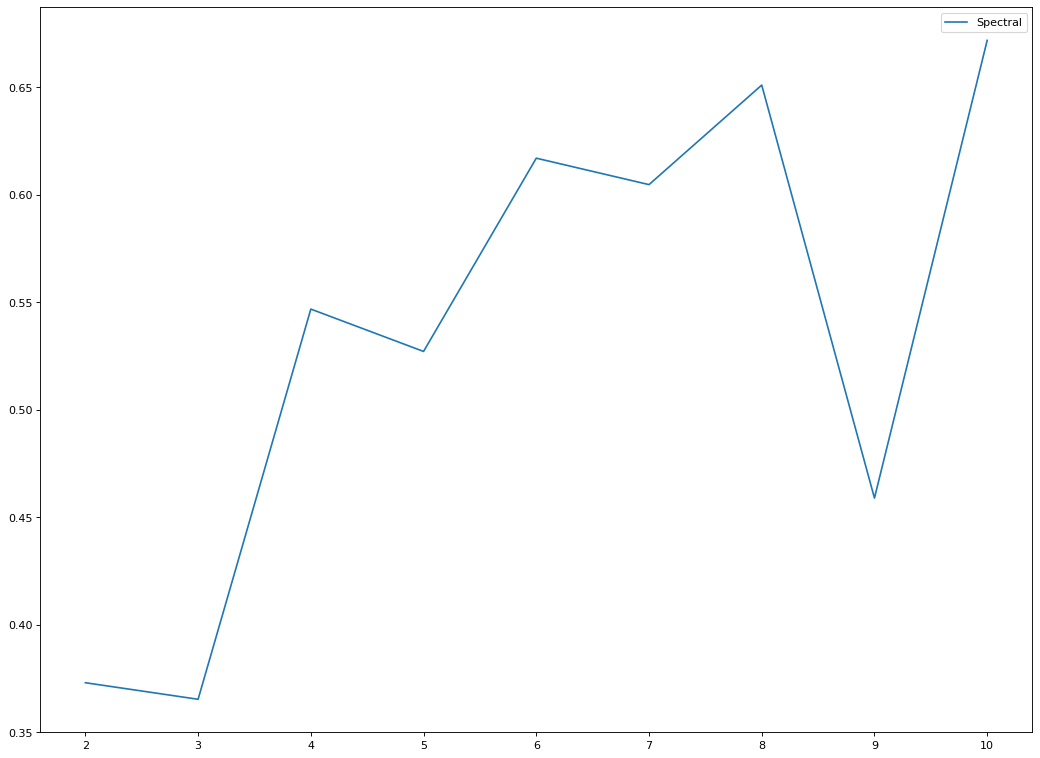

In [716]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') 
   
plt.plot([2,3,4,5,6,7,8,9,10],avr_ar,label = 'Spectral')


plt.legend()
plt.show()

In [726]:
writeToFile(logR_in_SP,SP_stocks,100,1)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 -----------------------
----------------------- 70 -----------------------
----------------------- 80 -----------------------
----------------------- 90 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 ------

In [724]:
writeToFile(logR_in_R,Russia_stocks,100,1)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 -----------------------
----------------------- 70 -----------------------
----------------------- 80 -----------------------
----------------------- 90 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 ------

In [722]:
writeToFile(logR_in_J,Japan_stocks,100,2)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 -----------------------
----------------------- 70 -----------------------
----------------------- 80 -----------------------
----------------------- 90 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 ------

In [725]:
writeToFile(logR_in_NYSE,NYSE_stocks,100,1)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 -----------------------
----------------------- 70 -----------------------
----------------------- 80 -----------------------
----------------------- 90 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 50 -----------------------
----------------------- 60 ------